In [4]:
import warnings
warnings.filterwarnings('ignore')

https://www.kaggle.com/code/rheajgurung/energy-consumption-forecast

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing and Cleaning Data

### Reading all the energy load data from different zones of london

In [6]:
folder_path = 'daily_dataset/daily_dataset/'

df_list = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

In [7]:
df.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [8]:
df.shape

(3510433, 9)

In [9]:
df.day.value_counts()

2012-12-18    5541
2012-11-19    5532
2012-11-20    5532
2012-11-21    5532
2012-11-25    5531
              ... 
2011-11-26      41
2011-11-27      41
2011-11-25      32
2011-11-24      25
2011-11-23      13
Name: day, Length: 829, dtype: int64

In [10]:
df_x = df[['day', 'energy_sum']]

In [11]:
df_x.head()

,day,energy_sum
0,2012-10-12,7.098
1,2012-10-13,11.087
2,2012-10-14,13.223
3,2012-10-15,10.257
4,2012-10-16,9.769


### Creating a new dataset that calculates the average of the average enerdy load across london

In [12]:
data = df_x.groupby('day').agg(energy_sum_average=('energy_sum', 'mean')).reset_index()

In [13]:
data.head()

,day,energy_sum_average
0,2011-11-23,6.952692
1,2011-11-24,8.536480
2,2011-11-25,9.499781
3,2011-11-26,10.267707
4,2011-11-27,10.850805


In [14]:
data.tail()

,day,energy_sum_average
824,2014-02-24,10.411403
825,2014-02-25,10.294997
826,2014-02-26,10.202945
827,2014-02-27,10.356350
828,2014-02-28,0.208997


In [15]:
data.day.value_counts()

2011-11-23    1
2013-06-02    1
2013-05-23    1
2013-05-24    1
2013-05-25    1
             ..
2012-08-28    1
2012-08-29    1
2012-08-30    1
2012-08-31    1
2014-02-28    1
Name: day, Length: 829, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   day                 829 non-null    object 
 1   energy_sum_average  829 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.1+ KB


In [17]:
data.isnull().sum()

day                   0
energy_sum_average    0
dtype: int64

## Analyzing the data

In [19]:
data['day'] = pd.to_datetime(data['day'])

In [21]:
data.head()

,day,energy_sum_average
0,2011-11-23,6.952692
1,2011-11-24,8.536480
2,2011-11-25,9.499781
3,2011-11-26,10.267707
4,2011-11-27,10.850805


In [23]:
data['energy_sum_average'] = pd.to_numeric(data['energy_sum_average'], errors='coerce')
data = data[data['energy_sum_average'].notna()]

In [25]:
data['year'] = data['day'].dt.year
data['quarter'] = data['day'].dt.quarter
data['month'] = data['day'].dt.month
data['date'] = data['day'].dt.day

In [26]:
data.head()

,day,energy_sum_average,year,quarter,month,date
0,2011-11-23,6.952692,2011,4,11,23
1,2011-11-24,8.536480,2011,4,11,24
2,2011-11-25,9.499781,2011,4,11,25
3,2011-11-26,10.267707,2011,4,11,26
4,2011-11-27,10.850805,2011,4,11,27


In [28]:
import calendar

In [29]:
data['month'] = data['month'].apply(lambda x: calendar.month_name[x])

In [30]:
data.head()

,day,energy_sum_average,year,quarter,month,date
0,2011-11-23,6.952692,2011,4,November,23
1,2011-11-24,8.536480,2011,4,November,24
2,2011-11-25,9.499781,2011,4,November,25
3,2011-11-26,10.267707,2011,4,November,26
4,2011-11-27,10.850805,2011,4,November,27


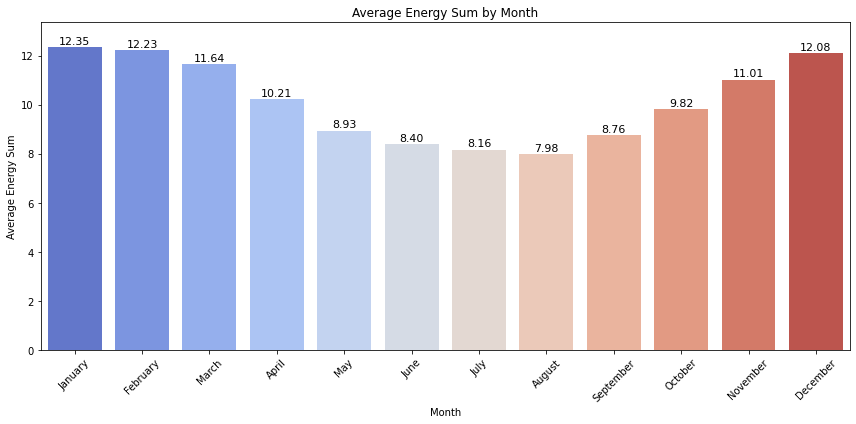

In [38]:
monthly_avg = data.groupby('month')['energy_sum_average'].mean().reindex(calendar.month_name[1:])

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')

for i, value in enumerate(monthly_avg.values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=11)

plt.xlabel('Month')
plt.ylabel('Average Energy Sum')
plt.title('Average Energy Sum by Month')
plt.xticks(rotation=45)
plt.ylim(0, max(monthly_avg.values) + 1)
plt.tight_layout()
plt.show()

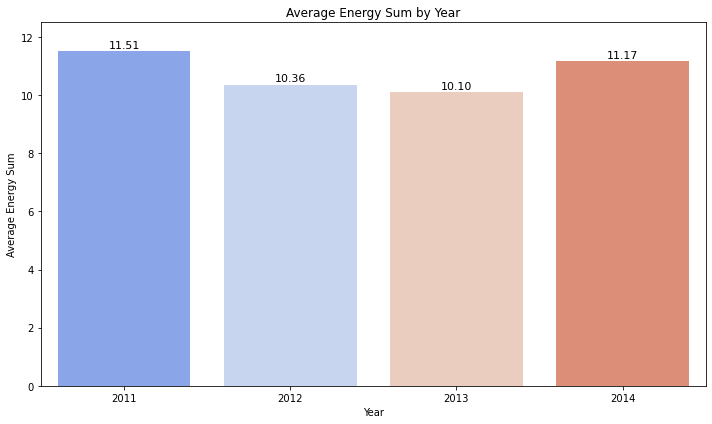

In [33]:
yearly_avg = data.groupby('year')['energy_sum_average'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette='coolwarm')
for i, value in enumerate(yearly_avg.values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=11)

plt.xlabel('Year')
plt.ylabel('Average Energy Sum')
plt.title('Average Energy Sum by Year')
plt.ylim(0, max(yearly_avg.values) + 1)
plt.tight_layout()
plt.show()

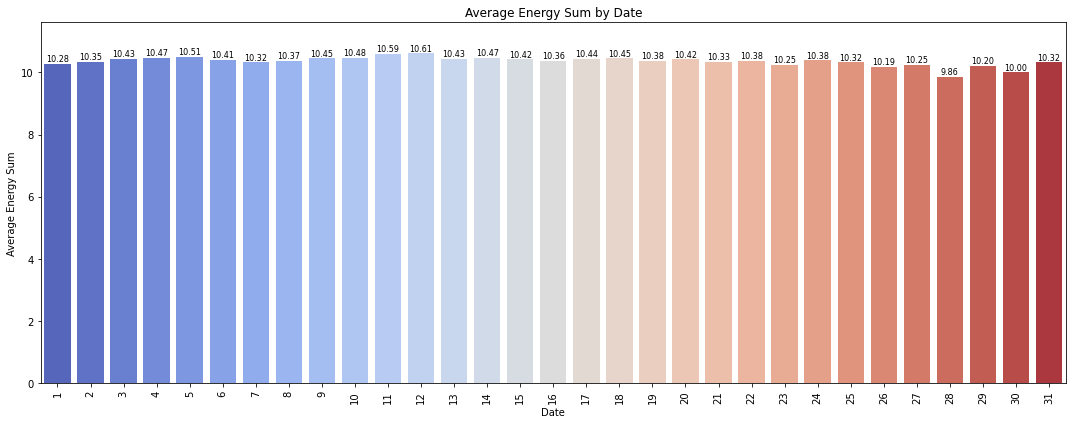

In [37]:
date_avg = data.groupby('date')['energy_sum_average'].mean()

plt.figure(figsize=(15, 6))
sns.barplot(x=date_avg.index, y=date_avg.values, palette='coolwarm')
for i, value in enumerate(date_avg.values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=8)
plt.xlabel('Date')
plt.ylabel('Average Energy Sum')
plt.title('Average Energy Sum by Date')
plt.ylim(0, max(date_avg.values) + 1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [46]:
data.energy_sum_average.describe()

count    829.000000
mean      10.358535
std        1.886266
min        0.208997
25%        8.565752
50%       10.372293
75%       11.832222
max       15.940238
Name: energy_sum_average, dtype: float64

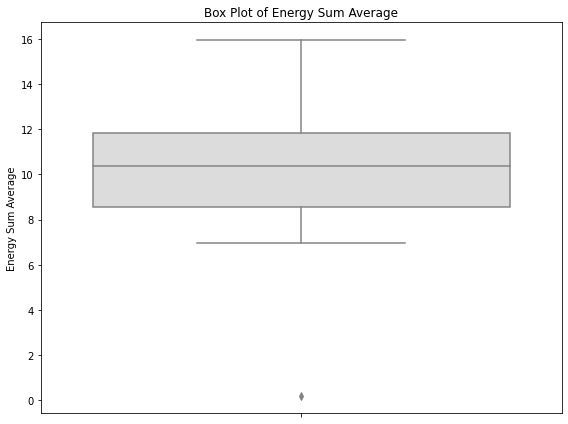

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['energy_sum_average'], palette='coolwarm')
plt.ylabel('Energy Sum Average')
plt.title('Box Plot of Energy Sum Average')
plt.tight_layout()
plt.show()

In [51]:
outlier_index = data[data['energy_sum_average'].round(6) == 0.208997].index
data = data.drop(outlier_index)
data = data.reset_index(drop=True)

In [52]:
data.energy_sum_average.describe()

count    828.000000
mean      10.370793
std        1.854073
min        6.952692
25%        8.566528
50%       10.376297
75%       11.832632
max       15.940238
Name: energy_sum_average, dtype: float64

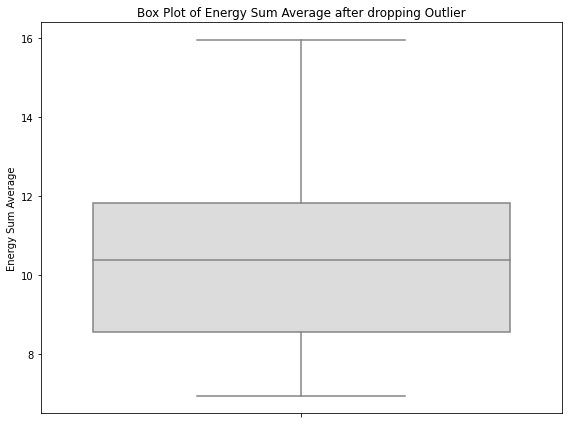

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['energy_sum_average'], palette='coolwarm')
plt.ylabel('Energy Sum Average')
plt.title('Box Plot of Energy Sum Average after dropping Outlier')
plt.tight_layout()
plt.show()

In [55]:
print('Minimum date:', data.day.min())
print('Maximum date:', data.day.max())

Minimum date: 2011-11-23 00:00:00
Maximum date: 2014-02-27 00:00:00


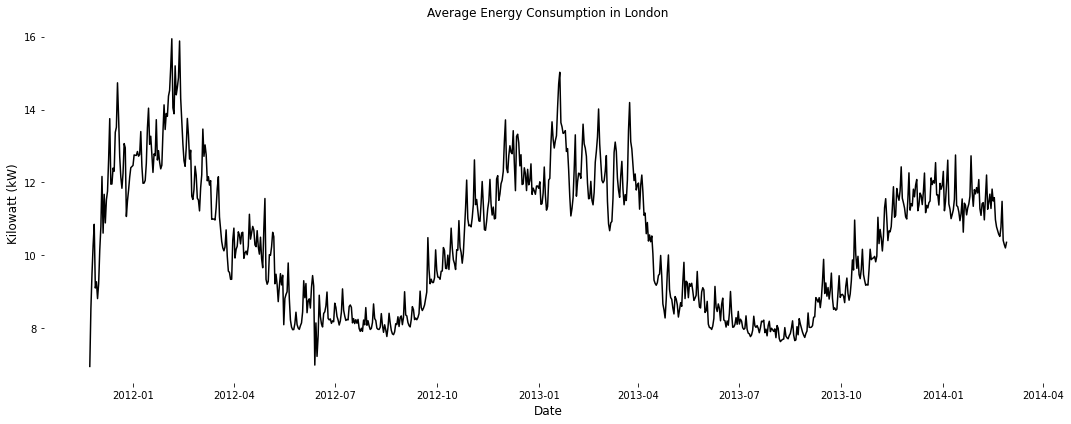

In [58]:
plt.figure(figsize=(15, 6))
plt.plot(data['day'], data['energy_sum_average'], color='black')
plt.ylabel('Kilowatt (kW)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Average Energy Consumption in London')
plt.tight_layout()
sns.despine(bottom=True, left=True)
plt.show()

## Modelling and Prediction

In [112]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
data_values = data['energy_sum_average'].astype('float32').values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_values)
split_index = int(len(scaled_data) * 0.8)
train, test = scaled_data[:split_index], scaled_data[split_index:]

In [139]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [140]:
look_back = 30
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [141]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [142]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### LSTM: 3 Layers

In [143]:
model = Sequential()

model.add(LSTM(2000, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.9))

model.add(LSTM(1000, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(500, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))

model.compile(loss='mean_squared_error', optimizer='adam')

In [144]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 1, 2000)           16248000  
                                                                 
 dropout_24 (Dropout)        (None, 1, 2000)           0         
                                                                 
 lstm_25 (LSTM)              (None, 1, 1000)           12004000  
                                                                 
 dropout_25 (Dropout)        (None, 1, 1000)           0         
                                                                 
 lstm_26 (LSTM)              (None, 500)               3002000   
                                                                 
 dropout_26 (Dropout)        (None, 500)               0         
                                                                 
 dense_8 (Dense)             (None, 30)               

In [145]:
history = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=25)], verbose=2, shuffle=False)

Epoch 1/50
7/7 - 16s - loss: 0.1607 - val_loss: 0.0447 - 16s/epoch - 2s/step
Epoch 2/50
7/7 - 4s - loss: 0.0487 - val_loss: 0.0270 - 4s/epoch - 510ms/step
Epoch 3/50
7/7 - 3s - loss: 0.0388 - val_loss: 0.0334 - 3s/epoch - 485ms/step
Epoch 4/50
7/7 - 3s - loss: 0.0237 - val_loss: 0.0123 - 3s/epoch - 490ms/step
Epoch 5/50
7/7 - 3s - loss: 0.0178 - val_loss: 0.0091 - 3s/epoch - 477ms/step
Epoch 6/50
7/7 - 3s - loss: 0.0173 - val_loss: 0.0053 - 3s/epoch - 481ms/step
Epoch 7/50
7/7 - 3s - loss: 0.0138 - val_loss: 0.0036 - 3s/epoch - 482ms/step
Epoch 8/50
7/7 - 3s - loss: 0.0115 - val_loss: 0.0048 - 3s/epoch - 481ms/step
Epoch 9/50
7/7 - 3s - loss: 0.0110 - val_loss: 0.0036 - 3s/epoch - 483ms/step
Epoch 10/50
7/7 - 3s - loss: 0.0102 - val_loss: 0.0042 - 3s/epoch - 480ms/step
Epoch 11/50
7/7 - 3s - loss: 0.0104 - val_loss: 0.0036 - 3s/epoch - 487ms/step
Epoch 12/50
7/7 - 3s - loss: 0.0098 - val_loss: 0.0039 - 3s/epoch - 486ms/step
Epoch 13/50
7/7 - 3s - loss: 0.0098 - val_loss: 0.0036 - 3s/ep

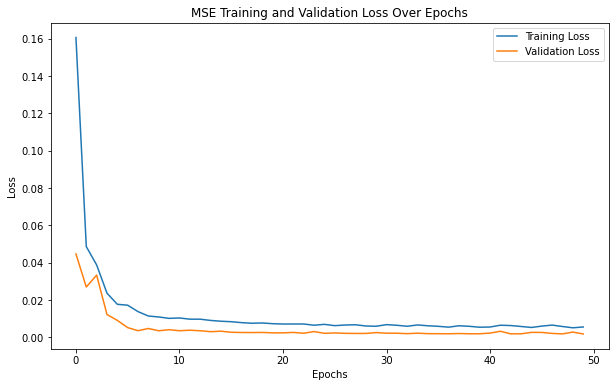

In [146]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MSE Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [147]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict = scaler.inverse_transform(train_predict)
y3_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y3_test = scaler.inverse_transform([y_test])

print('Train Mean Absolute Error:', mean_absolute_error(y3_train[0], train_predict[:,0]))
print('Test Mean Absolute Error:', mean_absolute_error(y3_test[0], test_predict[:,0]))

Train Mean Absolute Error: 0.35491376536058106
Test Mean Absolute Error: 0.3074568754964158


In [148]:
print("R2 score =", round(r2_score(y3_test[0], test_predict[:,0]), 2))

R2 score = 0.76


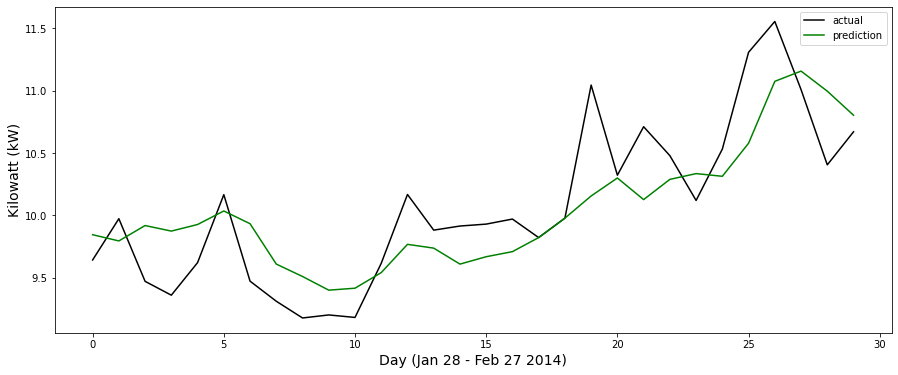

In [149]:
aa=[x for x in range(30)]                  
plt.figure(figsize=(15,6))
plt.plot(aa, y3_test[0][:30], label="actual", color='black')
plt.plot(aa, test_predict[:,0][:30], label="prediction", color='green')
plt.ylabel('Kilowatt (kW)', size=14)
plt.xlabel('Day (Jan 28 - Feb 27 2014)', size=14)
plt.legend()
plt.show()

### LSTM: 5 Layers

In [150]:
model = Sequential()

model.add(LSTM(2000, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.9))

model.add(LSTM(1500, return_sequences=True))
model.add(Dropout(0.7))

model.add(LSTM(1000, return_sequences=True))
model.add(Dropout(0.8))

model.add(LSTM(500, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(250, return_sequences=False))
model.add(Dropout(0.1))

model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))

model.compile(loss='mean_squared_error', optimizer='adam')

In [151]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 1, 2000)           16248000  
                                                                 
 dropout_27 (Dropout)        (None, 1, 2000)           0         
                                                                 
 lstm_28 (LSTM)              (None, 1, 1500)           21006000  
                                                                 
 dropout_28 (Dropout)        (None, 1, 1500)           0         
                                                                 
 lstm_29 (LSTM)              (None, 1, 1000)           10004000  
                                                                 
 dropout_29 (Dropout)        (None, 1, 1000)           0         
                                                                 
 lstm_30 (LSTM)              (None, 1, 500)           

In [152]:
history = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=25)], verbose=2, shuffle=False)

Epoch 1/50
7/7 - 33s - loss: 0.1767 - val_loss: 0.2070 - 33s/epoch - 5s/step
Epoch 2/50
7/7 - 7s - loss: 0.1407 - val_loss: 0.0138 - 7s/epoch - 974ms/step
Epoch 3/50
7/7 - 6s - loss: 0.0264 - val_loss: 0.0209 - 6s/epoch - 896ms/step
Epoch 4/50
7/7 - 6s - loss: 0.0234 - val_loss: 0.0052 - 6s/epoch - 798ms/step
Epoch 5/50
7/7 - 6s - loss: 0.0159 - val_loss: 0.0039 - 6s/epoch - 796ms/step
Epoch 6/50
7/7 - 6s - loss: 0.0131 - val_loss: 0.0043 - 6s/epoch - 830ms/step
Epoch 7/50
7/7 - 6s - loss: 0.0113 - val_loss: 0.0124 - 6s/epoch - 836ms/step
Epoch 8/50
7/7 - 6s - loss: 0.0152 - val_loss: 0.0153 - 6s/epoch - 879ms/step
Epoch 9/50
7/7 - 6s - loss: 0.0143 - val_loss: 0.0048 - 6s/epoch - 803ms/step
Epoch 10/50
7/7 - 6s - loss: 0.0111 - val_loss: 0.0032 - 6s/epoch - 789ms/step
Epoch 11/50
7/7 - 5s - loss: 0.0099 - val_loss: 0.0033 - 5s/epoch - 770ms/step
Epoch 12/50
7/7 - 5s - loss: 0.0096 - val_loss: 0.0030 - 5s/epoch - 770ms/step
Epoch 13/50
7/7 - 5s - loss: 0.0086 - val_loss: 0.0034 - 5s/ep

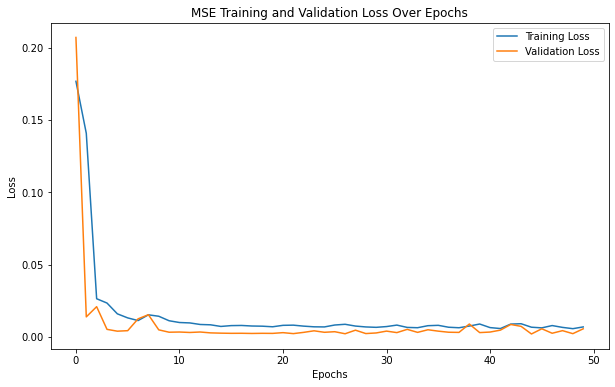

In [153]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MSE Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [154]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict = scaler.inverse_transform(train_predict)
y3_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y3_test = scaler.inverse_transform([y_test])

print('Train Mean Absolute Error:', mean_absolute_error(y3_train[0], train_predict[:,0]))
print('Test Mean Absolute Error:', mean_absolute_error(y3_test[0], test_predict[:,0]))
print("R2 score =", round(r2_score(y3_test[0], test_predict[:,0]), 2))

Train Mean Absolute Error: 0.5284471603592708
Test Mean Absolute Error: 0.5595590649585415
R2 score = 0.27


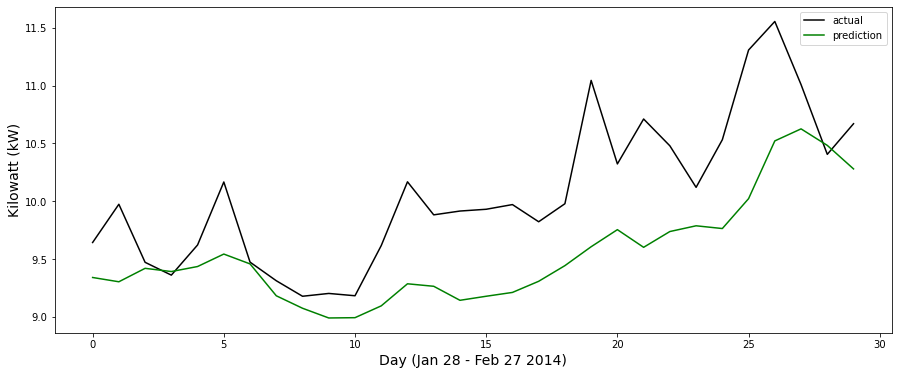

In [155]:
aa=[x for x in range(30)]                  
plt.figure(figsize=(15,6))
plt.plot(aa, y3_test[0][:30], label="actual", color='black')
plt.plot(aa, test_predict[:,0][:30], label="prediction", color='green')
plt.ylabel('Kilowatt (kW)', size=14)
plt.xlabel('Day (Jan 28 - Feb 27 2014)', size=14)
plt.legend()
plt.show()

### GRU: 3 Layers

In [157]:
model = Sequential()

model.add(GRU(2000, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.9))

model.add(GRU(1000, return_sequences=True))
model.add(Dropout(0.5))

model.add(GRU(500, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
model.compile(loss='mean_squared_error', optimizer='adam')

In [158]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 1, 2000)           12192000  
                                                                 
 dropout_35 (Dropout)        (None, 1, 2000)           0         
                                                                 
 gru_4 (GRU)                 (None, 1, 1000)           9006000   
                                                                 
 dropout_36 (Dropout)        (None, 1, 1000)           0         
                                                                 
 gru_5 (GRU)                 (None, 500)               2253000   
                                                                 
 dropout_37 (Dropout)        (None, 500)               0         
                                                                 
 dense_11 (Dense)            (None, 30)              

In [159]:
history = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=25)], verbose=2, shuffle=False)

Epoch 1/50
7/7 - 18s - loss: 0.0995 - val_loss: 0.0862 - 18s/epoch - 3s/step
Epoch 2/50
7/7 - 3s - loss: 0.0539 - val_loss: 0.0191 - 3s/epoch - 446ms/step
Epoch 3/50
7/7 - 3s - loss: 0.0235 - val_loss: 0.0169 - 3s/epoch - 374ms/step
Epoch 4/50
7/7 - 3s - loss: 0.0206 - val_loss: 0.0042 - 3s/epoch - 372ms/step
Epoch 5/50
7/7 - 3s - loss: 0.0145 - val_loss: 0.0043 - 3s/epoch - 369ms/step
Epoch 6/50
7/7 - 3s - loss: 0.0121 - val_loss: 0.0036 - 3s/epoch - 368ms/step
Epoch 7/50
7/7 - 3s - loss: 0.0110 - val_loss: 0.0036 - 3s/epoch - 365ms/step
Epoch 8/50
7/7 - 3s - loss: 0.0101 - val_loss: 0.0038 - 3s/epoch - 362ms/step
Epoch 9/50
7/7 - 3s - loss: 0.0104 - val_loss: 0.0024 - 3s/epoch - 368ms/step
Epoch 10/50
7/7 - 3s - loss: 0.0099 - val_loss: 0.0034 - 3s/epoch - 367ms/step
Epoch 11/50
7/7 - 3s - loss: 0.0093 - val_loss: 0.0026 - 3s/epoch - 374ms/step
Epoch 12/50
7/7 - 3s - loss: 0.0088 - val_loss: 0.0066 - 3s/epoch - 373ms/step
Epoch 13/50
7/7 - 3s - loss: 0.0117 - val_loss: 0.0089 - 3s/ep

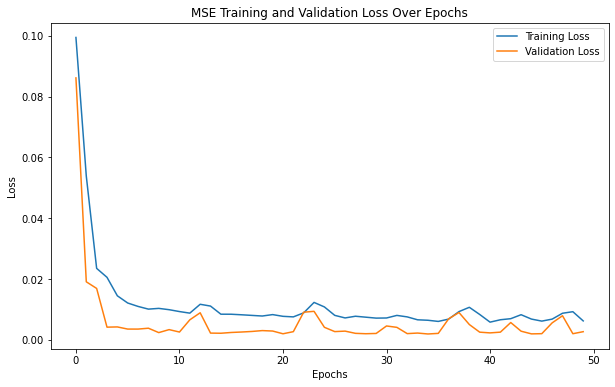

In [160]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MSE Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [161]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict = scaler.inverse_transform(train_predict)
y3_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y3_test = scaler.inverse_transform([y_test])

print('Train Mean Absolute Error:', mean_absolute_error(y3_train[0], train_predict[:,0]))
print('Test Mean Absolute Error:', mean_absolute_error(y3_test[0], test_predict[:,0]))
print("R2 score =", round(r2_score(y3_test[0], test_predict[:,0]), 2))

Train Mean Absolute Error: 0.3776812843854785
Test Mean Absolute Error: 0.3932654156444674
R2 score = 0.64


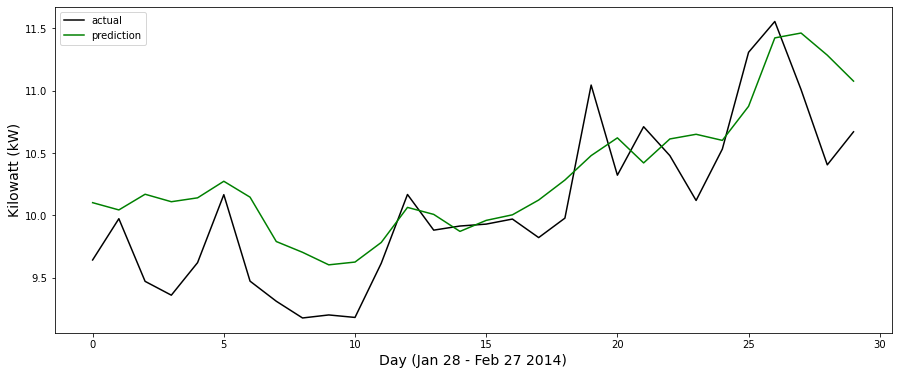

In [162]:
aa=[x for x in range(30)]                  
plt.figure(figsize=(15,6))
plt.plot(aa, y3_test[0][:30], label="actual", color='black')
plt.plot(aa, test_predict[:,0][:30], label="prediction", color='green')
plt.ylabel('Kilowatt (kW)', size=14)
plt.xlabel('Day (Jan 28 - Feb 27 2014)', size=14)
plt.legend()
plt.show()

### GRU: 5 Layers

In [163]:
model = Sequential()

model.add(GRU(2000, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.9))

model.add(GRU(1500, return_sequences=True))
model.add(Dropout(0.7))

model.add(GRU(1000, return_sequences=True))
model.add(Dropout(0.8))

model.add(GRU(500, return_sequences=True))
model.add(Dropout(0.3))

model.add(GRU(250, return_sequences=False))
model.add(Dropout(0.1))

model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
model.compile(loss='mean_squared_error', optimizer='adam')

In [164]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 1, 2000)           12192000  
                                                                 
 dropout_38 (Dropout)        (None, 1, 2000)           0         
                                                                 
 gru_7 (GRU)                 (None, 1, 1500)           15759000  
                                                                 
 dropout_39 (Dropout)        (None, 1, 1500)           0         
                                                                 
 gru_8 (GRU)                 (None, 1, 1000)           7506000   
                                                                 
 dropout_40 (Dropout)        (None, 1, 1000)           0         
                                                                 
 gru_9 (GRU)                 (None, 1, 500)          

In [165]:
history = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=25)], verbose=2, shuffle=False)

Epoch 1/50
7/7 - 31s - loss: 0.1345 - val_loss: 0.0804 - 31s/epoch - 4s/step
Epoch 2/50
7/7 - 5s - loss: 0.0676 - val_loss: 0.0385 - 5s/epoch - 687ms/step
Epoch 3/50
7/7 - 4s - loss: 0.0368 - val_loss: 0.0125 - 4s/epoch - 634ms/step
Epoch 4/50
7/7 - 5s - loss: 0.0278 - val_loss: 0.0060 - 5s/epoch - 747ms/step
Epoch 5/50
7/7 - 4s - loss: 0.0171 - val_loss: 0.0086 - 4s/epoch - 635ms/step
Epoch 6/50
7/7 - 4s - loss: 0.0185 - val_loss: 0.0055 - 4s/epoch - 631ms/step
Epoch 7/50
7/7 - 4s - loss: 0.0146 - val_loss: 0.0029 - 4s/epoch - 637ms/step
Epoch 8/50
7/7 - 4s - loss: 0.0124 - val_loss: 0.0034 - 4s/epoch - 595ms/step
Epoch 9/50
7/7 - 4s - loss: 0.0115 - val_loss: 0.0025 - 4s/epoch - 594ms/step
Epoch 10/50
7/7 - 4s - loss: 0.0122 - val_loss: 0.0046 - 4s/epoch - 631ms/step
Epoch 11/50
7/7 - 5s - loss: 0.0123 - val_loss: 0.0029 - 5s/epoch - 657ms/step
Epoch 12/50
7/7 - 4s - loss: 0.0119 - val_loss: 0.0028 - 4s/epoch - 642ms/step
Epoch 13/50
7/7 - 4s - loss: 0.0103 - val_loss: 0.0058 - 4s/ep

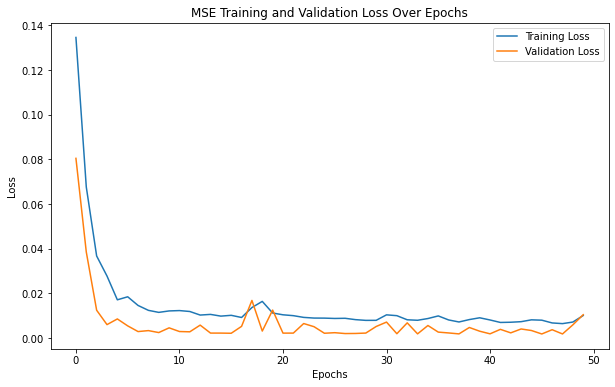

In [166]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MSE Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [167]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict = scaler.inverse_transform(train_predict)
y3_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y3_test = scaler.inverse_transform([y_test])

print('Train Mean Absolute Error:', mean_absolute_error(y3_train[0], train_predict[:,0]))
print('Test Mean Absolute Error:', mean_absolute_error(y3_test[0], test_predict[:,0]))
print("R2 score =", round(r2_score(y3_test[0], test_predict[:,0]), 2))

Train Mean Absolute Error: 0.6742868438663664
Test Mean Absolute Error: 0.8325210019088461
R2 score = -0.36


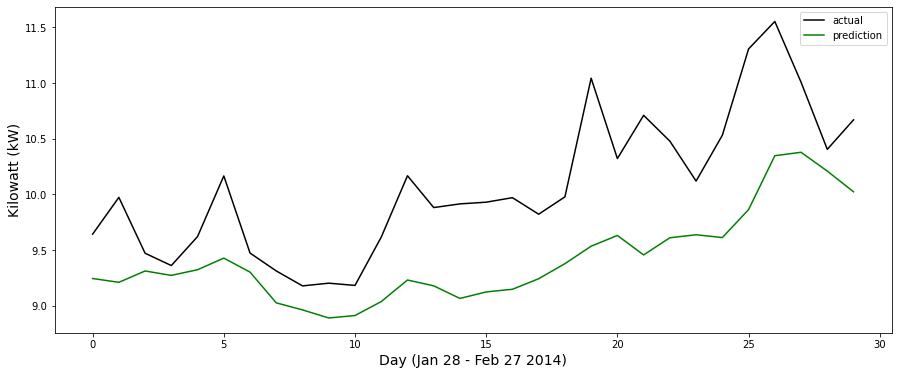

In [168]:
aa=[x for x in range(30)]                  
plt.figure(figsize=(15,6))
plt.plot(aa, y3_test[0][:30], label="actual", color='black')
plt.plot(aa, test_predict[:,0][:30], label="prediction", color='green')
plt.ylabel('Kilowatt (kW)', size=14)
plt.xlabel('Day (Jan 28 - Feb 27 2014)', size=14)
plt.legend()
plt.show()